In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def f1(v):
    x, y = v
    return (x - 3)**2 + (y - 2)**2  
def grad_f1(v):
    x, y = v
    return np.array([2 * (x - 3), 2 * (y - 2)])
def hess_f1(v):
    return np.array([[2, 0], [0, 2]])

In [15]:
#z=( x + y )**2 + 3( x – y )**2   
def f2(v): 
    x, y = v
    return (x + y)**2 + 3 * (x - y)**2
def grad_f2(v):
    x, y = v
    return np.array([2 * (x + y) + 6 * (x - y), 2 * (x + y) - 6 * (x - y)])
def hess_f2(v):
    return np.array([[8, -4], [-4, 8]])

In [13]:
#z=log(1+x**2+y**2)
def f3(v):
    x, y = v
    return np.log(1 + x**2 + y**2)
def grad_f3(v):
    x, y = v
    denom = 1 + x**2 + y**2
    return np.array([2 * x / denom, 2 * y / denom])
def hess_f3(v):
    x, y = v
    denom = 1 + x**2 + y**2
    return np.array([[2 * (denom - 2 * x**2) / denom**2, -4 * x * y / denom**2],
                     [-4 * x * y / denom**2, 2 * (denom - 2 * y**2) / denom**2]])

In [27]:
#z=8*x**3 + 12*x**2*y + 6*y**2 - 10*x + 5*y + 7 , having minimum at (0, 0), minimum value 7
def f5(v):
    x, y = v
    return 8 * x**3 + 12 * x**2 * y + 6 * y**2 - 10 * x + 5 * y + 7 
def grad_f5(v):
    x, y = v
    return np.array([24 * x**2 + 24 * x * y - 10, 12 * x**2 + 12 * y + 5])
def hess_f5(v):
    x, y = v
    return np.array([[48 * x + 24 * y, 24 * x], [24 * x, 12]])

In [48]:
def f6(v):
    x, y = v
    return np.exp(x) + np.exp(y) + x**2 + y**2
def grad_f6(v):
    x, y = v
    return np.array([np.exp(x) + 2 * x, np.exp(y) + 2 * y])
def hess_f6(v):
    x, y = v
    return np.array([[np.exp(x) + 2, 0], [0, np.exp(y) + 2]])

In [2]:
#z=sin(x)+y**2
def f8(v):
    x, y = v
    return np.sin(x) + y**2
def grad_f8(v):
    x, y = v
    df_dx = np.cos(x)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])
def hess_f8(v):
    x, y = v
    d2f_dx2 = -np.sin(x)
    d2f_dy2 = 2
    d2f_dxdy = 0
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

In [5]:

# Constants
K = 10
alpha = 0
np.random.seed(27)
phi = 2 * np.pi * np.random.rand(K, K)  # random fixed phases

# Function f(v) = sin(x) + y^2 + structured cosine noise
def f_structured(v):
    x, y = v
    f_val = np.sin(x) + y**2
    for k1 in range(K):
        for k2 in range(K):
            amp = 1.0 / (1 + k1**2 + k2**2)**(alpha / 2)
            f_val += 0.01*(amp * np.cos(k1 * x + k2 * y + phi[k1, k2]))
    return f_val
def grad_structured(v):
    x, y = v
    df_dx = np.cos(x)
    df_dy = 2 * y
    for k1 in range(K):
        for k2 in range(K):
            amp = 1.0 / (1 + k1**2 + k2**2)**(alpha / 2)
            df_dx += -0.01 * amp * k1 * np.sin(k1 * x + k2 * y + phi[k1, k2])
            df_dy += -0.01 * amp * k2 * np.sin(k1 * x + k2 * y + phi[k1, k2])
    return np.array([df_dx, df_dy])
def hess_structured(v):
    x, y = v
    d2f_dx2 = -np.sin(x)
    d2f_dy2 = 2
    d2f_dxdy = 0
    for k1 in range(K):
        for k2 in range(K):
            amp = 1.0 / (1 + k1**2 + k2**2)**(alpha / 2)
            d2f_dx2 += -0.01 * amp * k1**2 * np.cos(k1 * x + k2 * y + phi[k1, k2])
            d2f_dy2 += -0.01 * amp * k2**2 * np.cos(k1 * x + k2 * y + phi[k1, k2])
            d2f_dxdy += -0.01 * amp * k1 * k2 * np.cos(k1 * x + k2 * y + phi[k1, k2])
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

In [28]:
def newtons_method(f, grad_f, hessian_f, x_init, tolerance=1e-9, max_iter=1000):
    x = x_init.copy()
    f_values = [f(x)]
    grad_norms = [np.linalg.norm(grad_f(x))]
    direction_norms = []

    for _ in range(max_iter):
        grad = grad_f(x)
        hess = hessian_f(x)

        try:
            hess_inv = np.linalg.inv(hess)
        except np.linalg.LinAlgError:
            print("Hessian is not invertible at", x)
            break

        direction = -hess_inv @ grad
        direction_norms.append(np.linalg.norm(direction))

        x_new = x + direction
        f_values.append(f(x_new))
        grad_norms.append(np.linalg.norm(grad_f(x_new)))

        if np.linalg.norm(x_new - x) < tolerance:
            _ = _ - 1
            break

        x = x_new

    print(f"Converged after {_ + 1} iterations")
    print(f"Final position: {x}, Function value: {f(x)}")
    return f_values, grad_norms, direction_norms

In [7]:

def plot_newton_convergence(f_vals, direction_norms):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Function value plot
    axs[0].plot(f_vals, marker='o')
    axs[0].set_title("Function Value")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("f(x)")
    axs[0].grid(True)

    # Direction norm plot
    axs[1].plot(direction_norms, color='green')
    axs[1].set_title("Direction Norm")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("‖pₖ‖=(∇²fₖ)⁻¹∇fₖ")
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


Converged after 13 iterations
Final position: [-0.35173371 -0.35173371], Function value: 1.6543680522550488


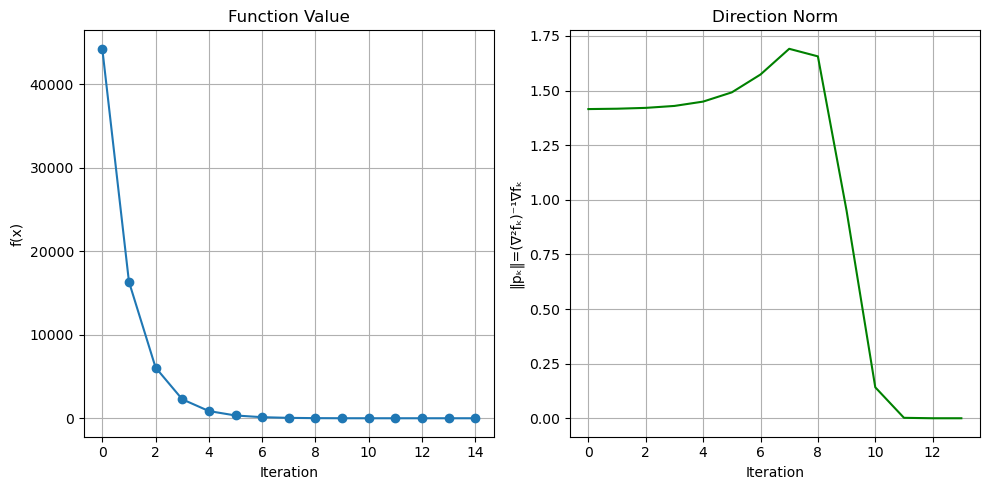

In [50]:
x0 = np.array([10, 10])
f_vals, grad_norms, step_norms = newtons_method(f6, grad_f6, hess_f6, x0)
plot_newton_convergence(f_vals, step_norms)

Converged after 88 iterations
Final position: [ 2.44022196e+05 -2.26351258e-01], Function value: 0.9211242313890493


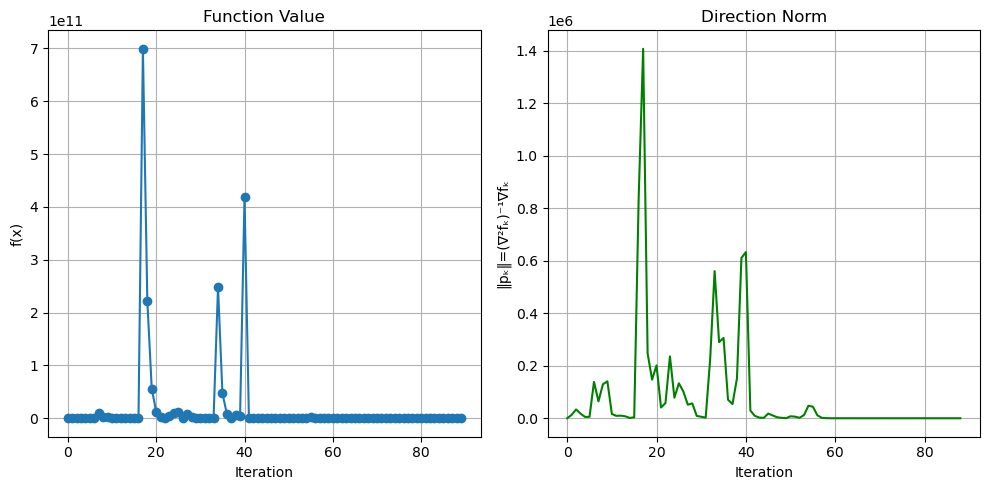

In [52]:
x0 = np.array([10, 10])
f_vals, grad_norms, step_norms = newtons_method(f_structured, grad_structured, hess_structured, x0)
plot_newton_convergence(f_vals, step_norms)

C:\Users\devan\AppData\Local\Temp\ipykernel_6096\1982070106.py:12: RuntimeWarning: overflow encountered in scalar power
  return np.array([[2 * (denom - 2 * x**2) / denom**2, -4 * x * y / denom**2],
C:\Users\devan\AppData\Local\Temp\ipykernel_6096\1982070106.py:13: RuntimeWarning: overflow encountered in scalar power
  [-4 * x * y / denom**2, 2 * (denom - 2 * y**2) / denom**2]])


Hessian is not invertible at [ 9.78031694e+76 -8.33138110e+76]
Converged after 252 iterations
Final position: [ 9.78031694e+76 -8.33138110e+76], Function value: 355.09928262123384


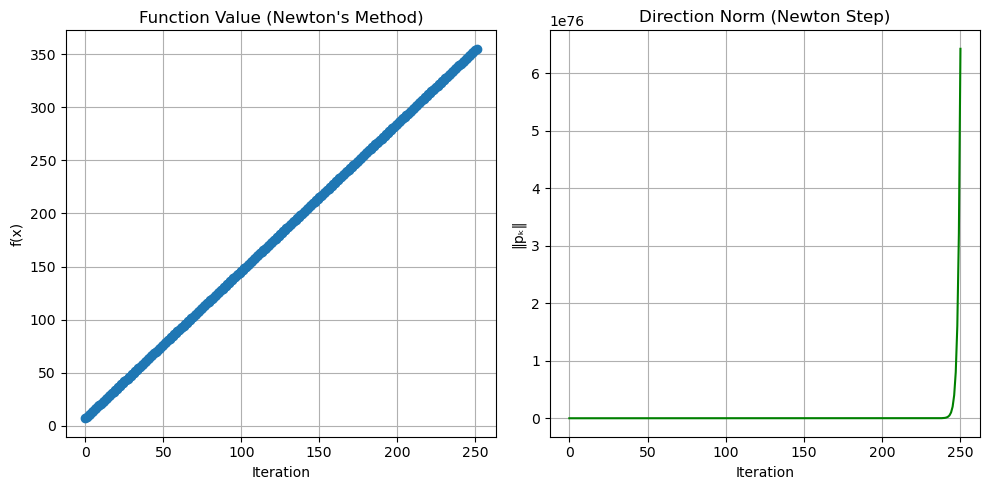

In [61]:
x0 = np.array([27, -23])
f_vals, grad_norms, step_norms = newtons_method(f3, grad_f3, hess_f3, x0)
plot_newton_convergence(f_vals, step_norms)

Converged after 21 iterations
Final position: [-0.41502928 -0.58891597], Function value: 8.497452647719859


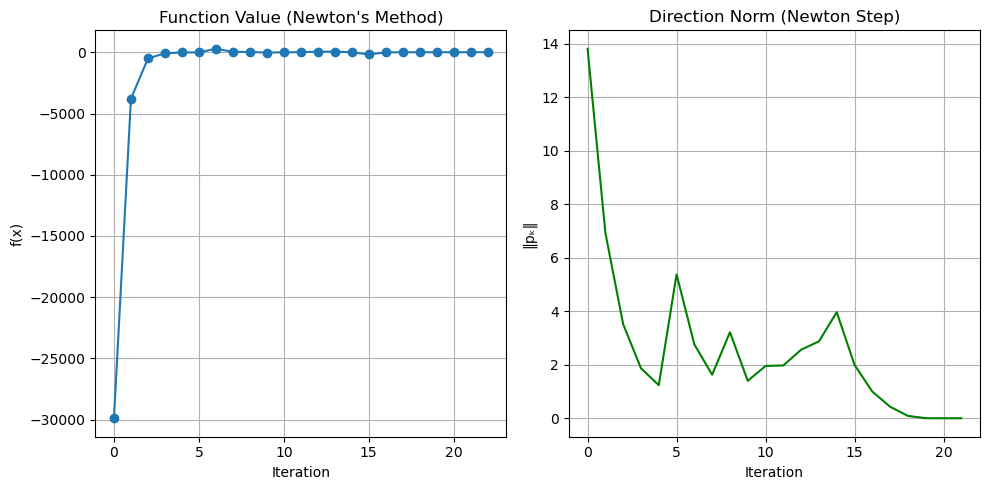

In [66]:
x0 = np.array([20, -20])
f_vals, grad_norms, step_norms = newtons_method(f5, grad_f5, hess_f5, x0)
plot_newton_convergence(f_vals, step_norms)

Converged after 13 iterations
Final position: [-0.35173371 -0.35173371], Function value: 1.6543680522550488


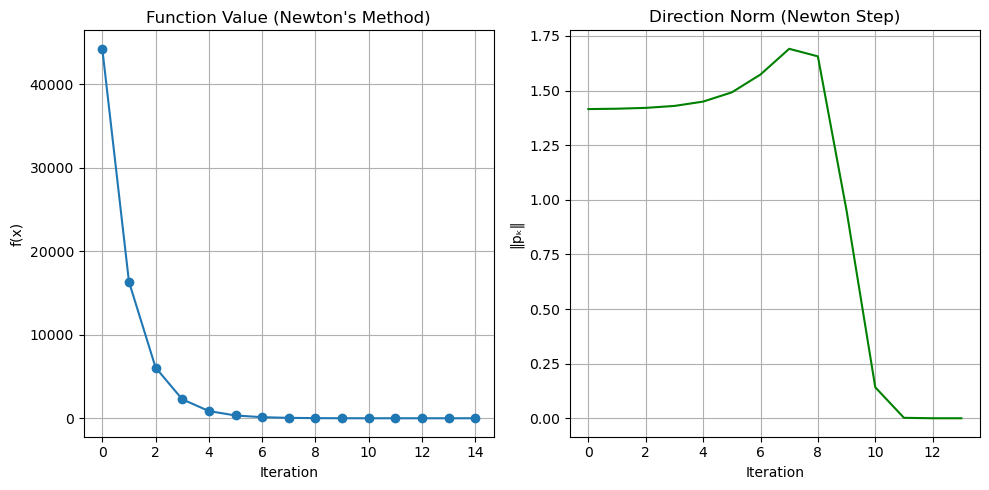

In [67]:
x0 = np.array([10, 10])
f_vals, grad_norms, step_norms = newtons_method(f6, grad_f6, hess_f6, x0)
plot_newton_convergence(f_vals, step_norms)

Converged after 3 iterations
Final position: [17.27875962  0.        ], Function value: -0.9999999999999997


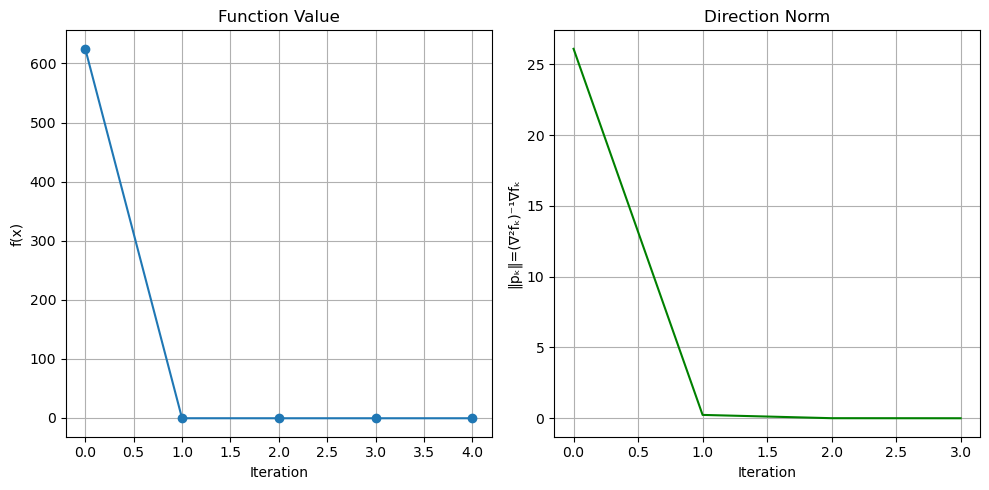

: 

In [ ]:
x0 = np.array([25,25 ])
f_vals, grad_norms, step_norms = newtons_method(f8, grad_f8, hess_f8, x0)
plot_newton_convergence(f_vals, step_norms)